# Project for the Games store "Streamchik"

### Description

Historical data on games sales, user and experts, genres, platforms (for example, Xbox or PlayStation) are available. It is necessary to identify the determining success of the game of patterns. This will allow you to bet on a potentially popular product and plan advertising companies.

There is data before us until 2016. It is necessary to plan the company for 2017.

Data description:

- `Name` - name of the game
- `Platform` - platform
- `Year_of_Release` - year of release
- `Genre` - genre of game
- `NA_sales` - Sales in North America (millions of copies sold)
- `EU_sales` - Sales in Europe (millions of copies sold)
- `JP_sales` - sales in Japan (millions of copies sold)
- `Other_sales` - sales in other countries (millions of copies sold)
- `Critic_Score` - Critics Assessment (maximum 100)
- `User_Score` - user rating (maximum 10)
- `Rating` - Rating from the organization [ESRB](https://ru.wikipedia.org/wiki/entertainment_software_rating_board "ESRB")

*Data for 2016 may not be complete

## Library Import General Settings

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats as st
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('dark_background')

## Primary analysis

In [2]:
try:
    path = os.path.join('/datasets/games.csv')
    data = pd.read_csv(path)
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
def first_view(data):
    title_lenght = 79
    title_one = 'Overview of the data of the first and last five rows'
    print('~' * int((title_lenght - len(title_one)) / 2), title_one, '~' * (title_lenght - len(title_one) - int((title_lenght - len(title_one)) / 2)))
    display(data.head(5))
    display(data.tail(5))
    print()
    title_two = 'General describe info'
    print('~' * int((title_lenght - len(title_two)) / 2), title_two, '~' * (title_lenght - len(title_two) - int((title_lenght - len(title_two)) / 2)))
    display(data.describe())
    print()
    title_three = 'Data type' 
    print('~' * int((title_lenght - len(title_three)) / 2), title_three, '~' * (title_lenght - len(title_three) - int((title_lenght - len(title_three)) / 2)))
    data.info()
    print()
    title_four = 'Missings'
    print('~' * int((title_lenght - len(title_four)) / 2), title_four, '~' * (title_lenght - len(title_four) - int((title_lenght - len(title_four)) / 2)))
    all_nulls = 0
    for col in data.columns:
       if data[col].isna().sum() > 0:
            all_nulls += 1
            print(f"{data[col].isna().sum()} missing values ​​in the column {col}. it's {round(data[col].isna().mean() * 100, 2)}%")
    if all_nulls == 0:
        print('There are no gaps in the data frame')
    print()
    title_five = 'Obvious duplicates'
    print('~' * int((title_lenght - len(title_five)) / 2), title_five, '~' * (title_lenght - len(title_five) - int((title_lenght - len(title_five)) / 2)))
    if data.duplicated().sum() > 0:
        print('Count of obvious duplicates - ', data.duplicated().sum())
    else:
        print('There is no Obvious duplicates in data frame')
    print()
    title_six = 'Histograms'
    print('~' * int((title_lenght - len(title_six)) / 2), title_six, '~' * (title_lenght - len(title_six) - int((title_lenght - len(title_six)) / 2)))
    data.hist(figsize = (8, 8));

~~~~~~~~~~~~~ Overview of the data of the first and last five rows ~~~~~~~~~~~~~~


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.00,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ General describe info ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Data type ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Missings ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 missing values ​​in the column Name. it's 0.01%
269 missing values ​​in t

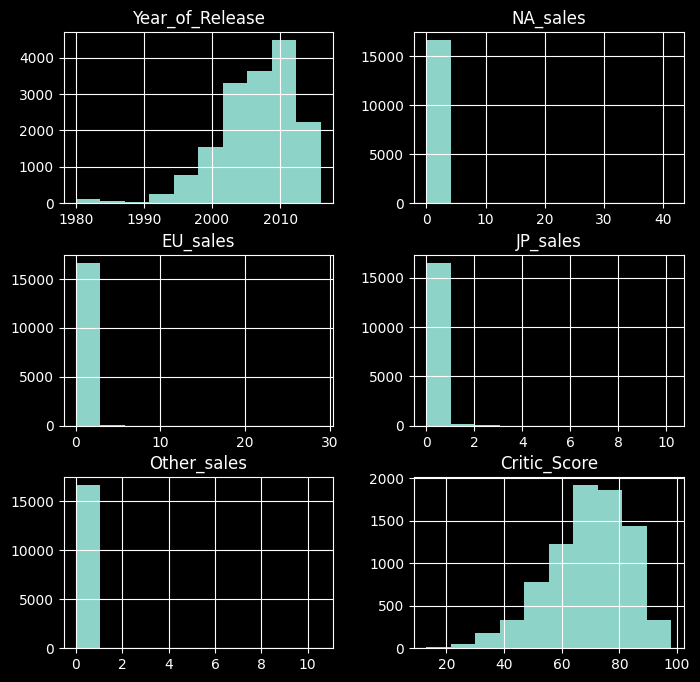

In [4]:
first_view(data)

you need to get rid of emissions in
a year to translate into whole values

## data reporting

### We correct the style of the names of the columns, make them in snake register

In [5]:
data.columns = data.columns.str.lower()

### We will convert data types

Out of the years

In [6]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

The data in the column have a Float format, and since we are dealing with a discrete size, this is not suitable for us.It is necessary to fix, but before that it is necessary to get rid of the rows with passes, there are only 269 such lines, it is about 2%, and they do not carry the semantic load in our analysis

In [7]:
data.dropna(subset = ['year_of_release'], inplace = True)

data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

The column with user ratings will be transferred from the Object to the Float type.

In [8]:
display(data['user_score'].unique())
display(data['user_score'].value_counts())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In addition to assessments and passes (`NaN`), the value of `tbd` is present, and in large quantities.

`tbd` is an abbreviation from the "To be Determined", it will be necessary to get rid of these values ​​and convert all the values ​​of the column into quantitative ones.
We apply the `to_numeric` method with the `errors = 'coerce'`, it will forcibly replace all the errors with `NaN`, we need it to get rid of the `tbd` values

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
display(data['user_score'].unique())

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Figure out with missings

We remove the line in which there is no name of the game, genre.There are only two such lines, and possibly only two, but it makes no sense to spend time being versed, it will be easier to get rid of them right away, they do not contain information useful for our analysis, but will be interfered

In [10]:
data.dropna(subset = ['name', 'genre'], inplace = True)

all_nulls = 0
for col in data.columns:
    if data[col].isna().sum() > 0:
        all_nulls += 1
        print(f"{data[col].isna().sum()} missing values ​​in the column {col}. it's {round(data[col].isna().mean() * 100, 2)}%")
if all_nulls == 0:
    print('There are no gaps in the data frame')

8461 missing values ​​in the column critic_score. it's 51.45%
8981 missing values ​​in the column user_score. it's 54.62%
6676 missing values ​​in the column rating. it's 40.6%


Consider a rating column

In [11]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Here you need a plug 'Unknown' for the NAN values ​​of the Rating column, the TC is further conducted on genres and data about games without a rating will not be on the graphs.

In [12]:
data['rating'].fillna(value='Unknown', inplace = True)

all_nulls = 0
for col in data.columns:
    if data[col].isna().sum() > 0:
        all_nulls += 1
        print(f"{data[col].isna().sum()} missing values ​​in the column {col}. it's {round(data[col].isna().mean() * 100, 2)}%")
if all_nulls == 0:
    print('There are no gaps in the data frame')

8461 missing values ​​in the column critic_score. it's 51.45%
8981 missing values ​​in the column user_score. it's 54.62%


There were only passes in the columns of assessments, there are quite a lot of them, they cannot be removed, it makes no sense to replace them either, we will leave them

### We calculate the total sales in all regions and write them down in a separate column

In [13]:
data['sales_total'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

## Research Analysis of Data

### The number of games released in different years

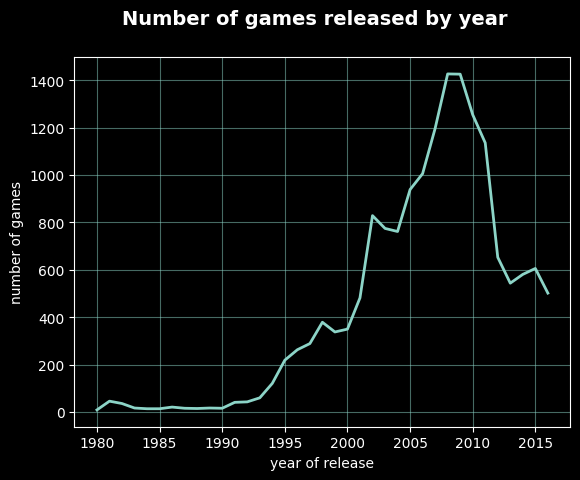

In [14]:
games_in_year = data.groupby('year_of_release')['name'].count()

fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust()
fig.suptitle('Number of games released by year', fontsize=14, fontweight='bold')
ax.set_xlabel('year of release')
ax.set_ylabel('number of games')
plt.grid(color=(0.55, 0.83, 0.78), alpha=0.5)
ax.plot(games_in_year, linewidth=2, color=(0.55, 0.83, 0.78))
plt.show()

From the graph it can be seen that:
- Until the 90s of the games, very few were produced
- The number of games produced is growing steadily until 2008 with small breaks in the speed of increasing the number of games in 1998 and 2002
- From 2008 to 2013, the number of data issues falls
- after 2013, the number is approximately stabilized in the range of 550-600 games per year

Since we are interested in the forecast for 2017, it will be logical to take the last period in which the number of games produced has stabilized, namely 2014-2016

### Changing sales on platforms

Let's look at the platforms, sales leaders

In [15]:
data.groupby('platform')['sales_total'].sum().sort_values(ascending=False)

platform
PS2    1233.56
X360    961.24
PS3     931.34
Wii     891.18
DS      802.78
PS      727.58
PS4     314.14
GBA     312.88
PSP     289.53
3DS     257.81
PC      255.76
GB      254.43
XB      251.57
NES     251.05
N64     218.01
SNES    200.04
GC      196.73
XOne    159.32
2600     86.48
WiiU     82.19
PSV      53.81
SAT      33.59
GEN      28.35
DC       15.95
SCD       1.86
NG        1.44
WS        1.42
TG16      0.16
3DO       0.10
GG        0.04
PCFX      0.03
Name: sales_total, dtype: float64

In [16]:
platform_life_span = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
platform_life_span['life_span'] = platform_life_span['max'] - platform_life_span['min']
avg_platform_life_span = np.round(platform_life_span['life_span'].mean())
print(f'Average period of relevance of the platform on the market: {avg_platform_life_span} years')

Average period of relevance of the platform on the market: 8.0 years


According to the calculations, the average date of relevance of the platform in the market is 8.0 years, let's look at the leaders of the poda, how they live, at the distribution of their sales by year

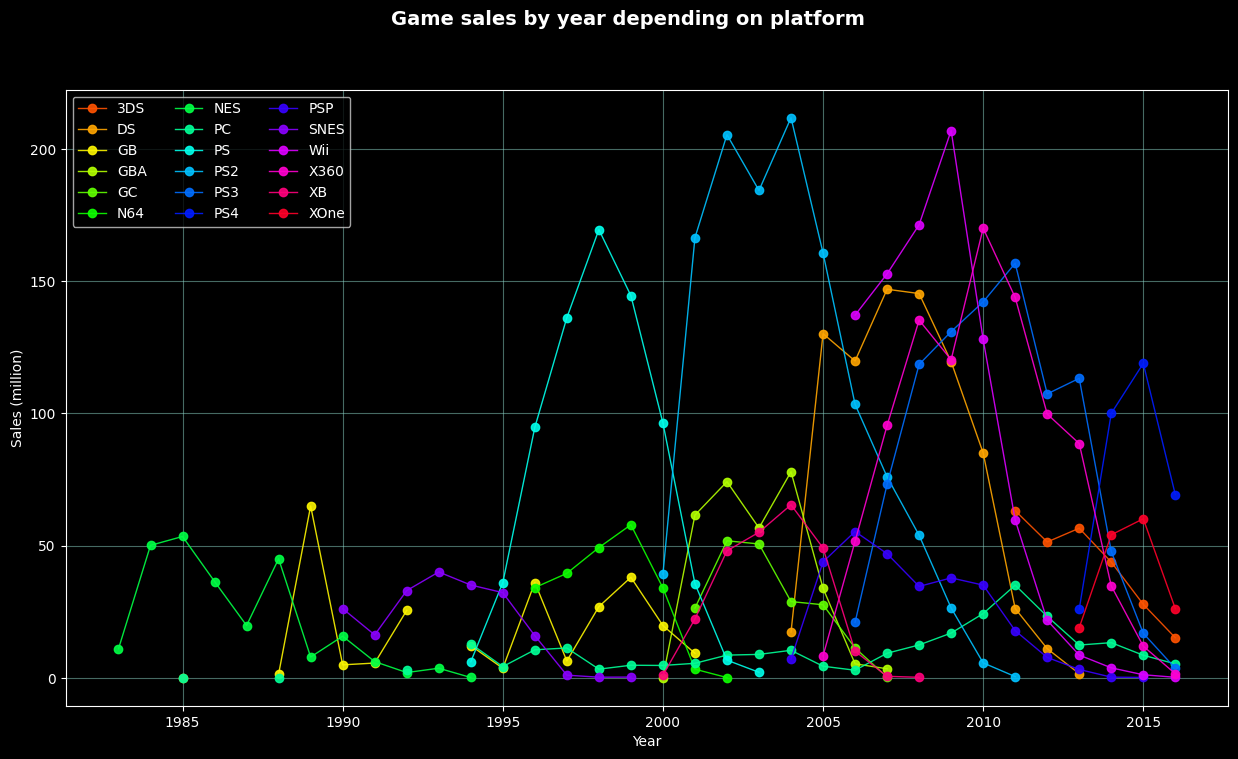

In [17]:
platform_top = data.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head(18)
platform_pivot = data.query('platform in @platform_top.index').pivot_table(index='platform', columns='year_of_release', values='sales_total', aggfunc='sum')

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot()
fig.subplots_adjust()
fig.suptitle('Game sales by year depending on platform', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Sales (million)')
plt.grid(color=(0.55, 0.83, 0.78), alpha=0.5)
palette = plt.get_cmap('hsv')
num = 0

for column in platform_pivot.T:
    num += int(256 / len(platform_pivot.T.columns))
    ax.plot(platform_pivot.T.index, platform_pivot.T[column], label=column, marker='o', color=palette(num), linewidth=1, alpha=0.9)

plt.legend(loc=2, ncol=3)
plt.show();

If you look at the schedule, it is clear that there are platforms, which, although they have a lot of pursuing according to statistics, they are no longer relevant for a long time.Passing individual examples.For starters, sales top, more than 500 million games sold:

- PS2 (1234 million copies) of 200-2011, lived for 11 years, no longer relevant
- x360 (961 million copies) 2005-2016, peak sales 2010, lived for 11 years, at the time of 2016, sales fell to zero, the platform has outlived its
- PS3 (931 million copies) of 2006-2016, peak sales 2011, lived for 10 years and at the time of 2016 sales are close to zero, the platform has aroused its own, for 2015 another 20 million copies were sold, the platform survives its own, onshe was replaced by PS4, which we will consider below
- WII (891 million copies) of 2006-2016, peak in 2009, sales began to fall even earlier than the previous two and at least the tail lasts until 2016, about 20 million copies were sold for 2015, the platform is also practically not relevantAnd he lives his own
- DS (803 million copies) in 2004-2013 in 2007 was relevant, now no longer
- PS (728 million copies) 1994-2003, the words of the excess - R.I.P.

From this we can conclude that we are not interested in these platforms at all in the table, although they brought their creators a good profit, but this is in the past.Let's look at the current platforms:
- PC (256 million copies) data in the table begin in 1994, but this case is unique in the table, this is a personal computer.Perhaps the number of copies sold on it is taken into account somehow differently and therefore it lags behind the other Platurm so much, despite the long life, but one way or another, its relevance will not fall for a long time, you should not discount it, even though thisAnd not a game console, people on a PC play and will play
- PS4 (314 million copies) bursts into the market in 2013 and until 2015 only gaining momentum and is at this moment the sales leader.This is interested in us
- Xone (159 million copies) looks like the main competitor PS4, also by 2015, sales are growing
- 3DS (258 million copies) The start of sales in 2011, at the time of 2015, about 30 million copies were sold, but the trend towards a decrease

The remaining platforms from this table do not hide us.

To make sure that we did not miss the current platforms filtering the Dataset for sales leaders, we will build graphs for the current platforms for 2016

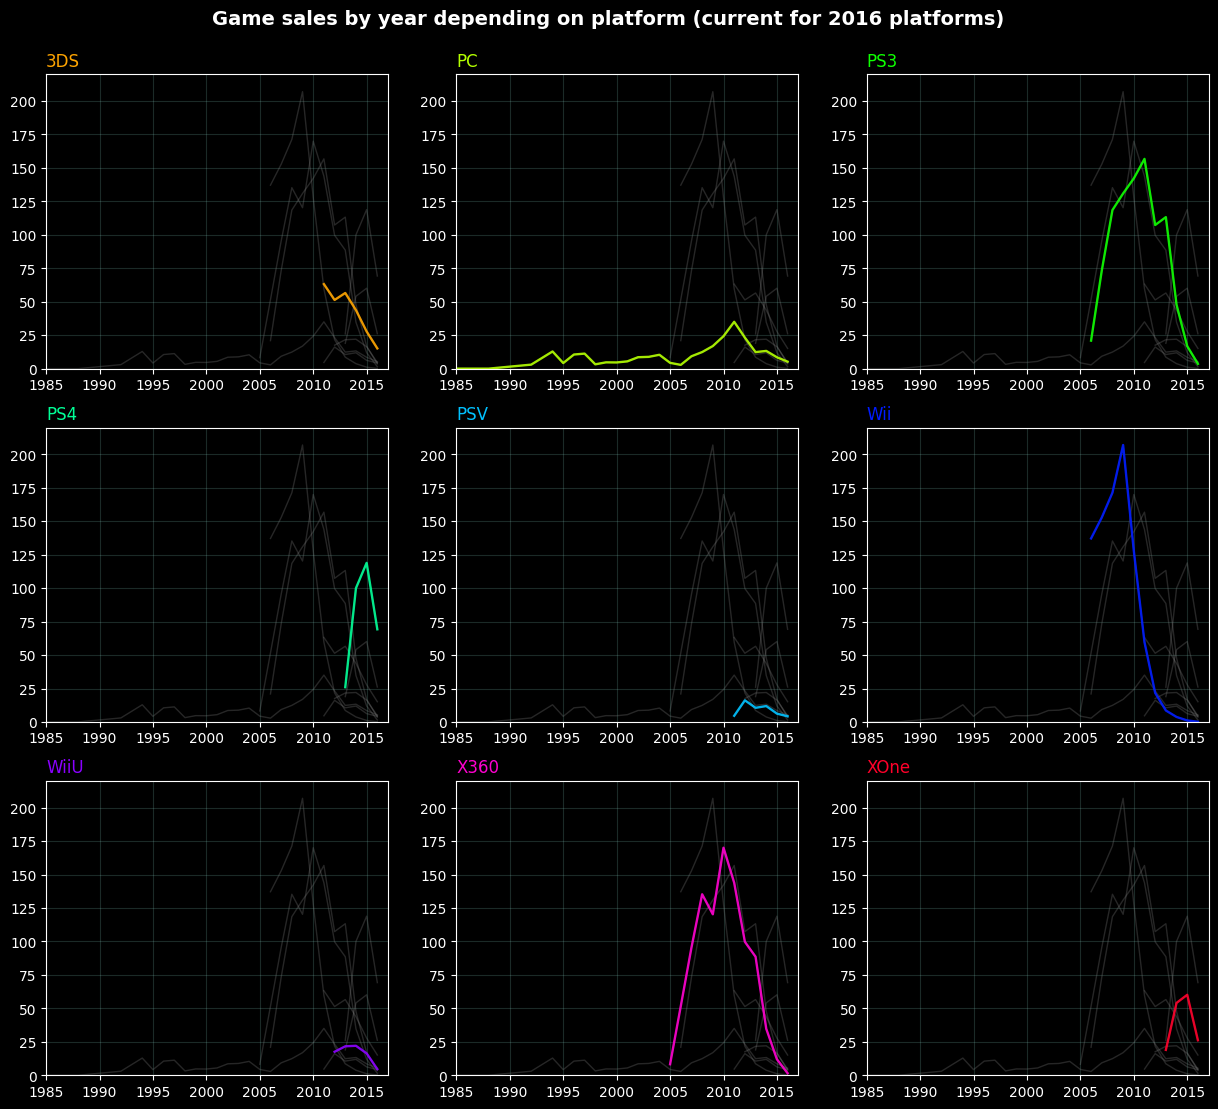

In [18]:
actual_2016_platforms = data.loc[data['year_of_release'] == 2016].groupby('platform')['sales_total'].sum()
platform_2016_pivot = data.query('platform in @actual_2016_platforms.index').pivot_table(index='platform', columns='year_of_release', values='sales_total', aggfunc='sum')

fig = plt.figure(figsize=(15, 13))
palette = plt.get_cmap('hsv')
num = 0
color = 0

for column in platform_2016_pivot.T:
    num += 1
    color += int(256 / len(platform_2016_pivot.T.columns))
    
    plt.subplot(3,3, num)
 
    for v in platform_2016_pivot.T:
        plt.plot(platform_2016_pivot.T.index, platform_2016_pivot.T[v], marker='', color='grey', linewidth=1, alpha=0.3)
 
    plt.plot(platform_2016_pivot.T.index, platform_2016_pivot.T[column], marker='', color=palette(color), linewidth=1.7, alpha=0.9, label=column)
 
    plt.xlim(1985,2017)
    plt.ylim(0,220)
    
    plt.grid(color=(0.55, 0.83, 0.78), alpha=0.2)

    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(color) )

plt.suptitle('Game sales by year depending on platform (current for 2016 platforms)', y=0.93, fontsize=14, fontweight='bold')
plt.show();

Indeed, we almost missed WIIU and PSV, although there were not many copies of the games on these platforms, but they are relevant and it was worth considering.

For further analysis and forecast of 2017, we will need the current period.All current platforms for 2016 begin their existence in 2013 or earlier.Trends in the field of games are often changing, so you should take a short period before the forecast year, we take the 2014-2016 period.

### We will filter the table

Let's make a cut for the current period

In [19]:
a_year = [2014, 2015, 2016]
a_data = data.query('year_of_release in @a_year')
print(a_data['year_of_release'].unique())

[2015 2014 2016]


### Loam boxes

(0.0, 3.0)

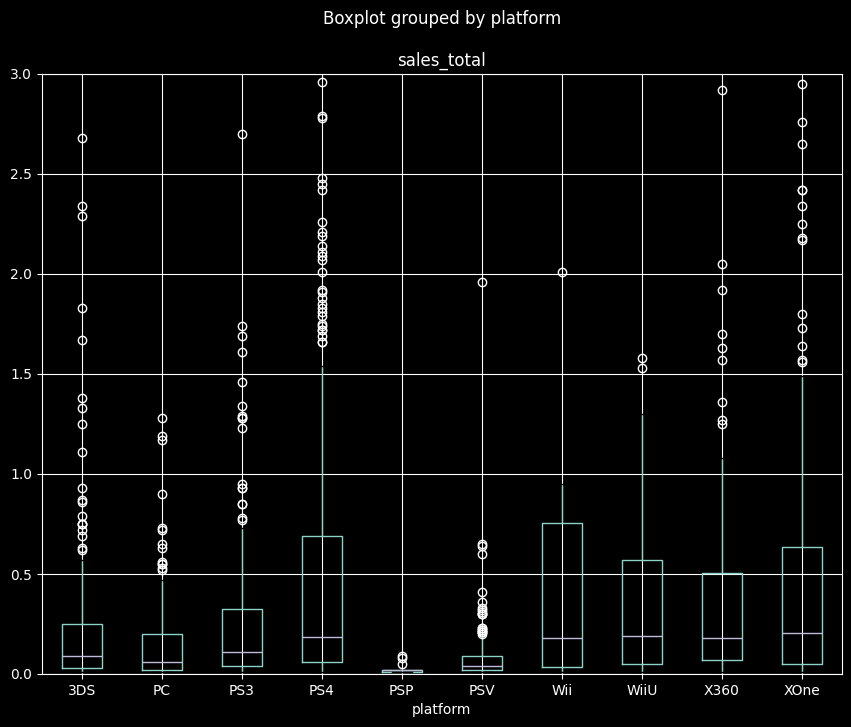

In [20]:
a_data.boxplot('sales_total', by='platform',figsize=(10,8)).set_ylim(0,3)

During the current period for games, PS4 and Xone platforms lead the games, the scatter of games of the games to these platforms is very similar to each other.The bulk of the performance indicators for the game on this platform is from 100 thousand to 1.1 million copies with a median near 300 thousand with emissions for 2.5 million copies of individual games.
The worst of all the PSV is, games are rarely sold in more than 250 thousand copies, and the bulk of sales around about 50 thousand copies.Also in the results there is a PSP who still has to do it, but as we recall according to the schedule of the platforms that were relevant for 2016, it was not there, and therefore the platform lost its relevance in the current period, therefore such low indicators.

### influence of reviews on sales

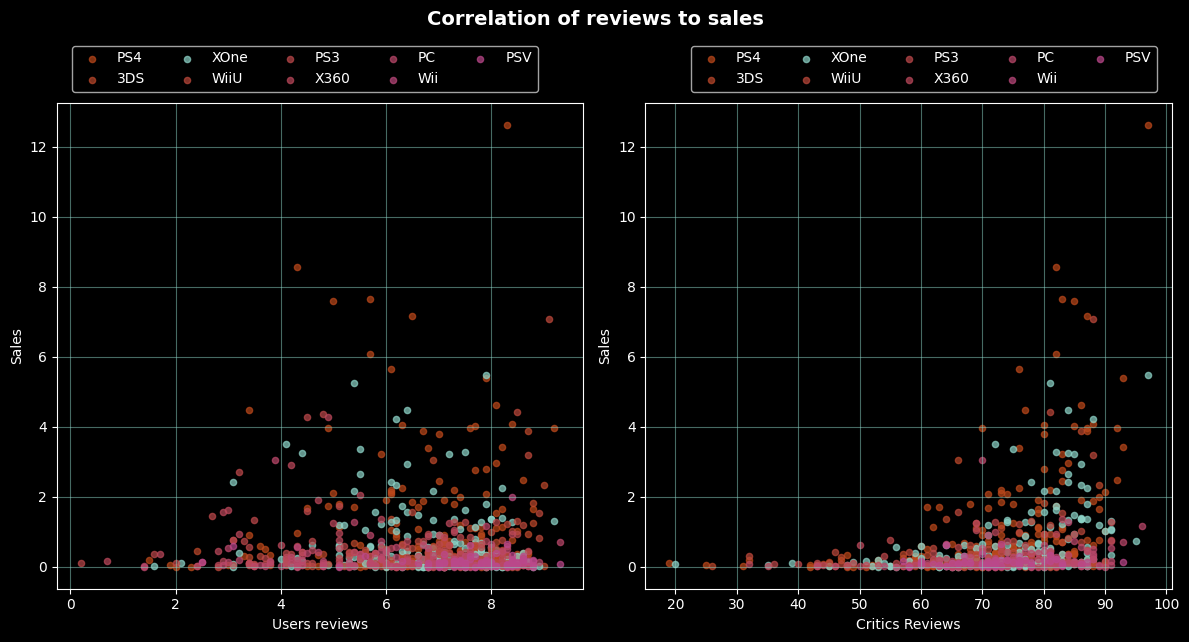

In [21]:
a_platform = a_data["platform"].values
a_sales = a_data['sales_total'].values
a_user_scores = a_data['user_score'].values
a_critic_scores = a_data['critic_score'].values
a_platforms_list = a_data["platform"].unique()

color_list = ["#BB481B", "#BB482B", "#8DD3C7", "#BB483B", "#BB484B", "#BB485B", "#BB486B", "#BB487B", "#BB488B"] 

fig, axes = plt.subplots(1, 2, figsize=(12, 6.5), tight_layout=True)
fig.suptitle('Correlation of reviews to sales', fontsize=14, fontweight='bold')

for pfm, clr in zip(a_platforms_list, color_list):
    idxs = np.where(a_platform == pfm)
    axes[0].scatter(
        a_user_scores[idxs], a_sales[idxs], label=pfm,
        s=20, color=clr, alpha=0.7
    )
    
    axes[1].scatter(
        a_critic_scores[idxs], a_sales[idxs], label=pfm,
        s=20, color=clr, alpha=0.7
    )

axes[0].set_ylabel('Sales')
axes[1].set_ylabel('Sales')
axes[0].set_xlabel('Users reviews')
axes[1].set_xlabel('Critics Reviews')
axes[0].grid(color=(0.55, 0.83, 0.78), alpha=0.5)
axes[1].grid(color=(0.55, 0.83, 0.78), alpha=0.5)

axes[0].legend(
    loc="center left", 
    ncol=5,
    bbox_to_anchor=[0, 1.07],
    borderaxespad=1.1,
)

axes[1].legend(
    loc="center right", 
    ncol=5,
    bbox_to_anchor=[1, 1.07],
    borderaxespad=1.1,
);

#### Count and output with the text of the correlations for PS4 and the rest of the platforms separately

In [22]:

ps4 = a_data.query('platform == "PS4"')
no_ps4 = a_data.query('platform != "PS4"')

ps4_user_corr = ps4['user_score'].corr(data['sales_total'])
ps4_critic_corr = ps4['critic_score'].corr(data['sales_total'])
no_ps4_user_corr = no_ps4['user_score'].corr(data['sales_total'])
no_ps4_critic_corr = no_ps4['critic_score'].corr(data['sales_total'])

print(f'the correlation of user reviews to sales for PS4 is: {ps4_user_corr:.2f}')
print(f'the correlation of critic reviews to sales for PS4 is: {ps4_critic_corr:.2f}')
print(f'the correlation of user reviews to sales for other platforms is: {no_ps4_user_corr:.2f}')
print(f'the correlation of critic reviews to sales for other platforms is: {no_ps4_critic_corr:.2f}')

the correlation of user reviews to sales for PS4 is: -0.04
the correlation of critic reviews to sales for PS4 is: 0.40
the correlation of user reviews to sales for other platforms is: -0.02
the correlation of critic reviews to sales for other platforms is: 0.31


Critics correlate reviews with sales on the most popular PS4 platform, on all other platforms it also correlates but a little less.

Reviews of users do not have such a correlation.

### Distribution by genres

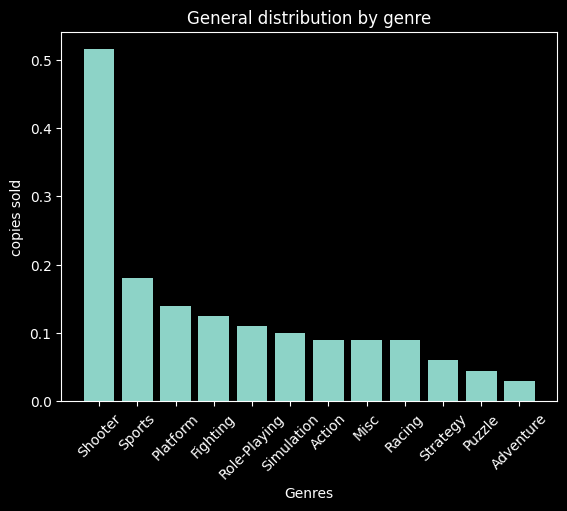

In [23]:
a_genres_spread = a_data.groupby('genre')['sales_total'].median().sort_values(ascending=False)

gn_spr_height = a_genres_spread.values
gn_spr_bars = a_genres_spread.index
x_pos = np.arange(len(gn_spr_bars))

plt.bar(x_pos, gn_spr_height, color='#8DD3C7')
plt.title('General distribution by genre')
plt.xlabel('Genres')
plt.ylabel('copies sold')
plt.xticks(x_pos, gn_spr_bars, rotation=45)
plt.show()

The most profitable genre is:
1. In the first place shooters
2. On the second sports simulators
3. On the third platformers

## Portrait of a user by region

### Popularity of platforms in the regions

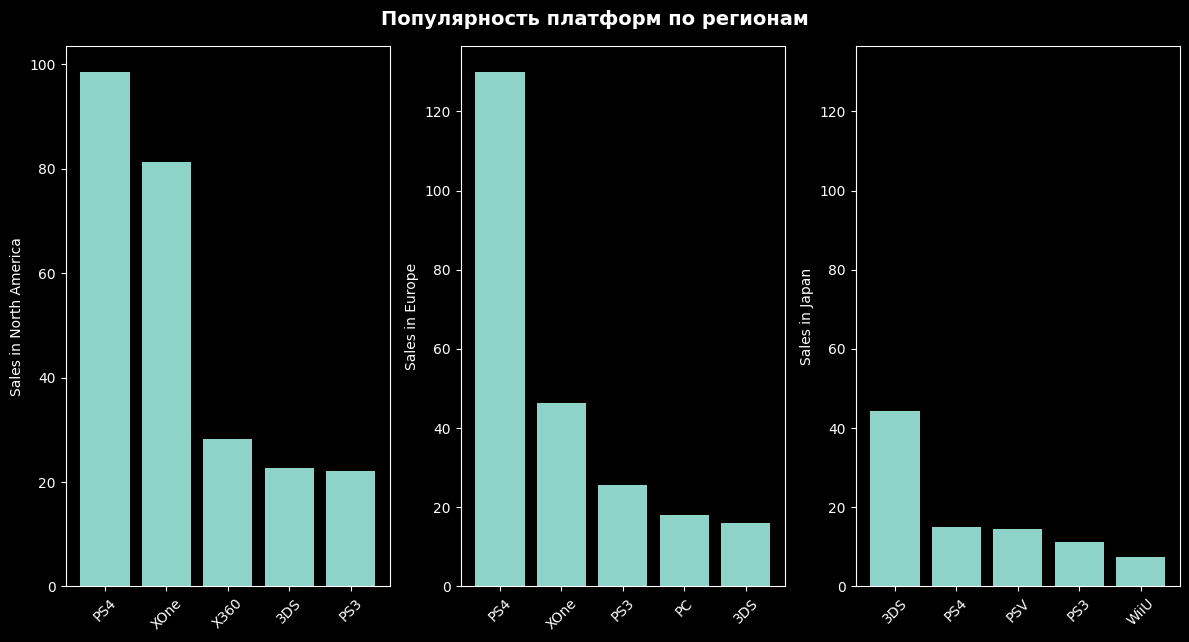

In [24]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

fig, axes = plt.subplots(1, 3, figsize=(12, 6.5), tight_layout=True)
fig.suptitle('Популярность платформ по регионам', fontsize=14, fontweight='bold')

for rgn, indx in zip(regions, range(len(regions))):
    height = a_data.groupby('platform')[rgn].sum().sort_values(ascending=False).head(5).values
    bars = a_data.groupby('platform')[rgn].sum().sort_values(ascending=False).head(5).index
    x_pos = np.arange(len(bars))
    axes[indx].set_xticks(x_pos)
    axes[indx].set_xticklabels(bars, rotation=45)
    axes[indx].bar(x_pos, height, color='#8DD3C7')
    if indx > 0:
        if axes[indx].get_ylim() < axes[indx-1].get_ylim():
            axes[indx].set_ylim(axes[indx-1].get_ylim())
        elif axes[indx].get_ylim() > axes[indx-1].get_ylim():
            for i in range(indx-1):
                axes[i].set_ylim(axes[indx].get_ylim())

axes[0].set_ylabel('Sales in North America')
axes[1].set_ylabel('Sales in Europe')
axes[2].set_ylabel('Sales in Japan')

plt.show()

In NA and especially the EU leads PS4.In America, in more than other regilled, Xbox platforms are popular.In Japan, Xbox is not at all included in the 5 leaders, and there is its favorite - the portable console Nintendo 3DS

### Popularity of genres in the regions

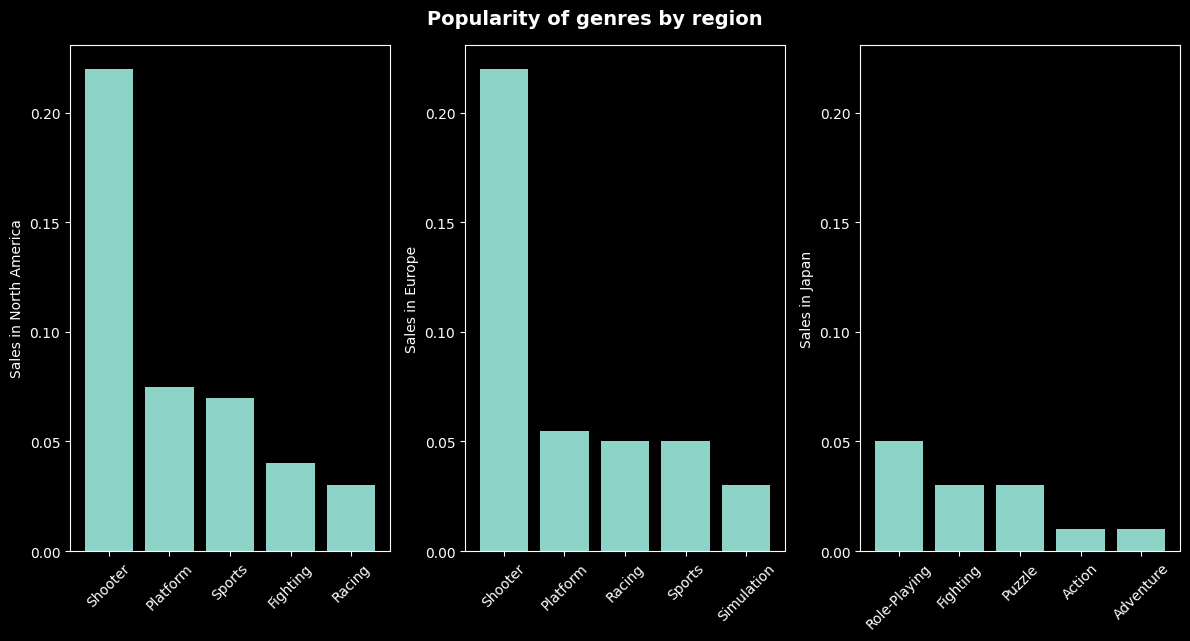

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6.5), tight_layout=True)
fig.suptitle('Popularity of genres by region', fontsize=14, fontweight='bold')

for rgn, indx in zip(regions, range(len(regions))):
    height = a_data.groupby('genre')[rgn].median().sort_values(ascending=False).head(5).values
    bars = a_data.groupby('genre')[rgn].median().sort_values(ascending=False).head(5).index
    x_pos = np.arange(len(bars))
    axes[indx].set_xticks(x_pos)
    axes[indx].set_xticklabels(bars, rotation=45)
    axes[indx].bar(x_pos, height, color='#8DD3C7')
    if indx > 0:
        if axes[indx].get_ylim() < axes[indx-1].get_ylim():
            axes[indx].set_ylim(axes[indx-1].get_ylim())
        elif axes[indx].get_ylim() > axes[indx-1].get_ylim():
            for i in range(indx-1):
                axes[i].set_ylim(axes[indx].get_ylim())
                
axes[0].set_ylabel('Sales in North America')
axes[1].set_ylabel('Sales in Europe')
axes[2].set_ylabel('Sales in Japan')
plt.show()

The ratio of popular genres in Europe and North America seems to be a lot of players in second place platformers, and then by a small margin in the United States there are sports simulators, inchings and races, and in Europe races, sports simulators and just simulators.
In Japan, the picture differs, in the first place there is the RPG of the game, in the second place in the ending, in the third place puzzles, then other games, as well as the top 5 includes action games

As a conclusion, Japan is a region with its genre features, unlike the Western world.The shooters there are not so popular like in the West, but popular RPG.

*(Misc) Miscellaneous games - Games not included in other classification classification classification

### Effect ESBR rating on sales in the regions

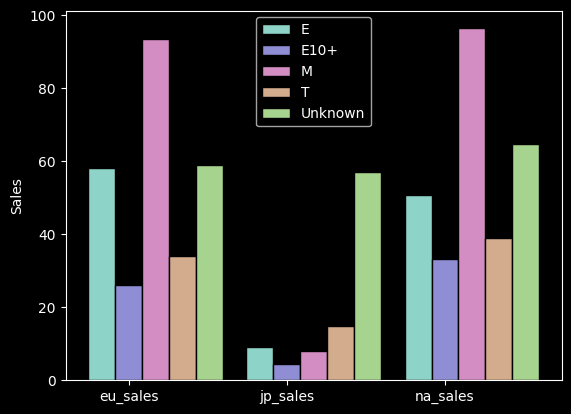

In [26]:
a_esbr_pivot = a_data.pivot_table(index='rating', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum').T

bars1 = a_esbr_pivot['E'].values
bars2 = a_esbr_pivot['E10+'].values
bars3 = a_esbr_pivot['M'].values
bars4 = a_esbr_pivot['T'].values
bars5 = a_esbr_pivot['Unknown'].values

bar_width = 0.17
r1 = np.arange(len(bars1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

plt.bar(r1, bars1, width = bar_width, color = '#8DD3C7', edgecolor = 'black', capsize=7, label='E')
plt.bar(r2, bars2, width = bar_width, color = '#8F8DD3', edgecolor = 'black', capsize=7, label='E10+')
plt.bar(r3, bars3, width = bar_width, color = '#D38DC3', edgecolor = 'black', capsize=7, label='M')
plt.bar(r4, bars4, width = bar_width, color = '#D3AB8D', edgecolor = 'black', capsize=7, label='T')
plt.bar(r5, bars5, width = bar_width, color = '#A6D38D', edgecolor = 'black', capsize=7, label='Unknown')

plt.xticks([r + bar_width for r in range(len(bars1))], a_esbr_pivot.index)
plt.ylabel('Sales')
plt.legend()
plt.show()

These ratings indicate the following:
- `«E»` («Everyone») - “For all”
- `«E10+»` («Everyone 10 and older») - “For all 10 years and older”
- `«T»` («Teen») - “teenagers”
- `«M»` («Mature») - “for adults”

In total, we have an increased demand for games with the “adults” rating in the western part of our dataset, and in Japan the vast majority of games have no grades and are slightly higher than the rest of the teenage games, but against the background of the missing rating, this difference seems insignificant.This is most likely due to the fact that another rating system operates in Japan, so there are no values ​​about ESRB ratings.Read more on this topic [here(RU)](https://kanobu-ru.turbopages.org/kanobu.ru/s/articles/stavlyu-na-cero-368311/ "stavlyu-na-cero")

## Check Hypothesis

Zero hypothesis: average user ratings of the Xbox One and PC platforms are the same

Alternative hypothesis: average user ratings of the Xbox One and PC platforms are not the same

In [27]:
results = st.ttest_ind(
    a_data[a_data['platform'] =='XOne']['user_score'], 
    a_data[a_data['platform'] =='PC']['user_score'],
    nan_policy='omit'
)

alpha = 0.05

print(results.pvalue) 

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

0.10450507919348416
Failed to reject the null hypothesis


Zero hypothesis: average user ratings of Action and Sports genres are the same

Alternative hypothesis: average user ratings of Action and Sports genres are not the same

In [28]:
results = st.ttest_ind(
    a_data[a_data['genre'] =='Action']['user_score'], 
    a_data[a_data['genre'] =='Sports']['user_score'],
    nan_policy='omit'
)

alpha = 0.05

print(results.pvalue) 

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

2.8711147985105864e-19
Rejecting the null hypothesis


## General conclusion

### Brief List of Actions done:
- formatted columns
- Getting rid of lines with passes in columns with the name of games, genre, release date
- checked the presence of obvious duplicates, they were not found
- added a column with the amount of sales in all regions
- did a research analysis of the data
- built visual graphs illustrating our forecasts
- checked the indicated hypotheses

### during the study, we found out that:

- The average lifespan of the platform is 8 years old

- At the time of 2016, 9 platforms are active ('PS3', 'X360', 'PS4', '3DS', 'XONE', 'WIIU', 'WII', 'PC', 'PSV')

- The current period should be counted 2014-2016 since during this period all the current platforms of 2016 already exist, during this period the current trends are most likely already formed, and the decline in sales has also ceased from the moment of the 2008 crisis has ceased

- The prognosis of games sales by 2017, proceed from the development trends of game platforms as follows:
    1. PlayStation 4 and Xbox One are developing platforms and will be relevant in 2017 with a high probability.Sales for the current period of both platforms are very close and have a scatter of 100 to 1100 million copies sold.When taking into account trends in dilution, these are platforms that are definitely worth considering.

    2. PlayStation 3 and Xbox 360 of the platform at the time of 2016 are still quite significantly represented on the market, but sales are rapidly falling and new generations of consoles were replaced by it.

    3. PC games do not have large sales indicators in comparison with consoles, but the platform is not old and the demand for it does not fall

    4. In Japan, the Nintende 3DS console will still maintain its relevance, but its sales fall and will be less than in 2016.you can count on a small sales, but you should not focus on this platform

    5. Nintendo WII clearly loses its relevance, and the WIIU replaced it at the start of its sales did not take success and sales began to fall almost immediately, it is risky to count on the success of this platform

    6. PlayStation Vita is also a little popular console, sales are large and were not even at the peak, and they continue to fall

- Critics reviews correlate with sales and does not depend on the platform.It is impossible to say exactly about a causal relationship, whether the reviews of sales or good sales affect, they stimulate to write good reviews, but the correlation should be taken into account in making decisions

- User reviews do not depend on sales, they can poorly evaluate the game sold, they can respond well about poorly pronounced, the connection is not traced and this should not affect the forecasts of the profitability of a particular game

- In Europe and North America, the most popular genres are Shooter, Sport, Platform in this sequence of descending.In Japan, RPG is the leader

- Japan is a region with its genre characteristics, unlike the Western world.The shooters there are not so popular like in the West, but popular RPG.

- In Europe and North America, games are popular with the rating M (for adults) according to ESRB assessment

- In Japan, another system of age-related games of games is widespread, so it will not be based on ESRB in Japan

- average user ratings of the Xbox One and PC platforms are the same

- average user ratings of the genres Action and Sports are not the same